# Machine Learning Challenge: Predict Titanic Survivors
More information on the [Kaggle site](https://www.kaggle.com/c/titanic/data)

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = 'kaggle.json'

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd




In [11]:
# get titanic & test csv files as a DataFrame
training = pd.read_csv("train.csv")

In [12]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
training.describe() # some interesting statistics for features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
training.keys() # Show features names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Variable Description
- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

In [15]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


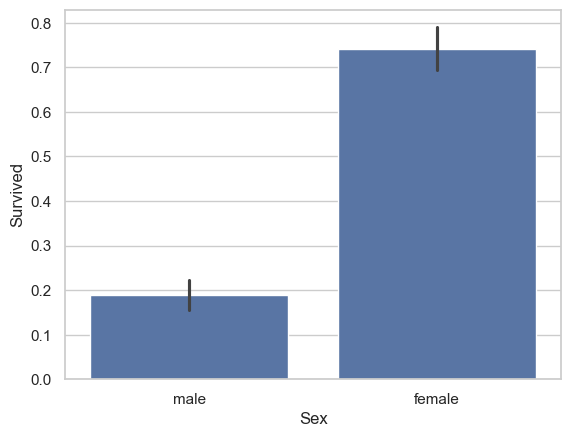

In [16]:
# Survived rate by sex
sns.barplot(x="Sex", y="Survived", data=training);

<Axes: xlabel='Pclass', ylabel='Survived'>

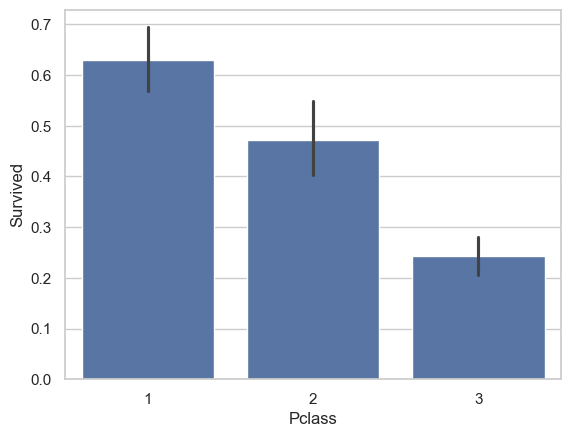

In [17]:
# Survived rate by Pclass
sns.barplot(x="Pclass", y="Survived", data=training)

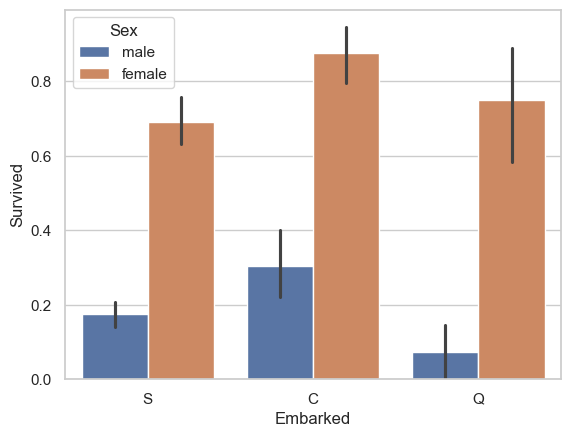

In [18]:
# Survived rate by Embarked
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=training);

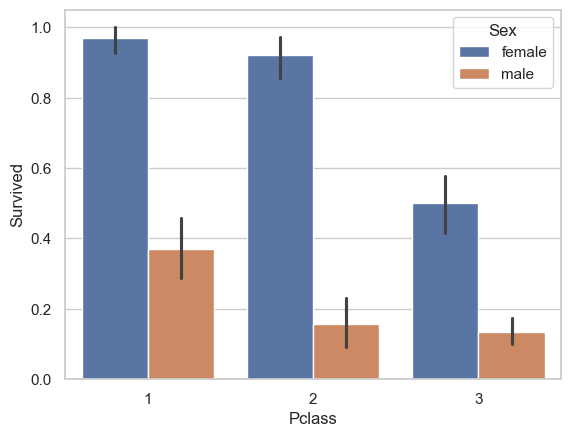

In [19]:
# Survived rate by Pclas and Sex
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training);

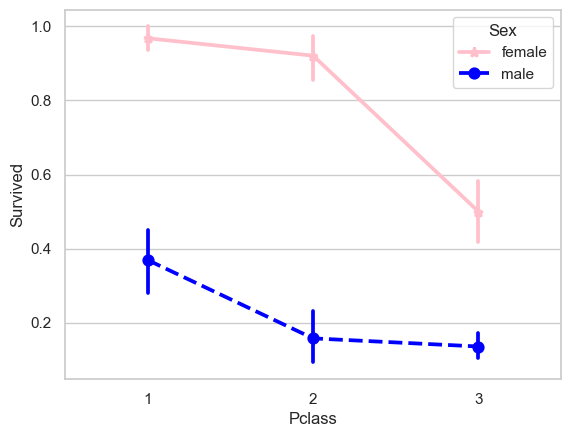

In [20]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=training,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

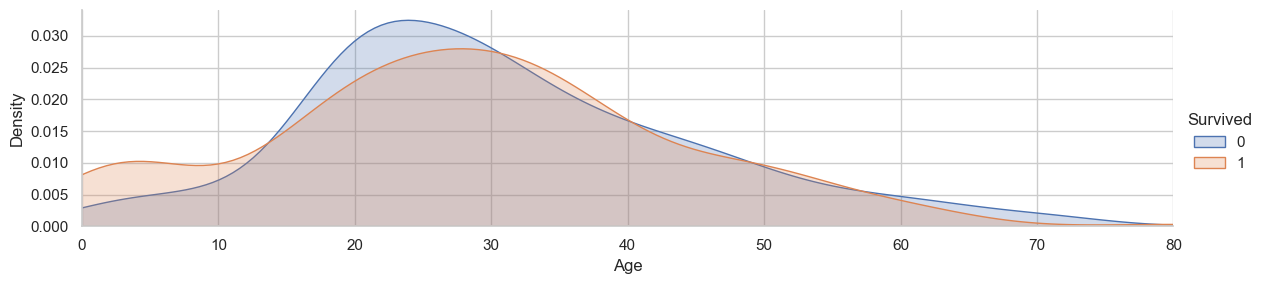

In [21]:
# peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(training, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, training['Age'].max()))
facet.add_legend()

In [22]:
training = training.drop(['Name','Ticket', 'Cabin'], axis=1)

In [23]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
# Filling missing age values with median
training.Age = training.Age.fillna(training.Age.median())

In [25]:
# Age is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [26]:
Counter(training.Embarked.values)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [27]:
training.Embarked = training.Embarked.fillna('S')

In [28]:
# Embarked is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [29]:
Counter(training.Pclass.values)

Counter({3: 491, 1: 216, 2: 184})

In [30]:
embark_dummies_titanic  = pd.get_dummies(training['Embarked'])
sex_dummies_titanic  = pd.get_dummies(training['Sex'])
pclass_dummies_titanic  = pd.get_dummies(training['Pclass'], prefix="Class")

In [31]:
embark_dummies_titanic.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [32]:
sex_dummies_titanic.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [33]:
pclass_dummies_titanic.head()

,Class_1,Class_2,Class_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [34]:
training = training.drop(['Embarked', 'Sex', 'Pclass'], axis=1)
titanic = training.join([embark_dummies_titanic, sex_dummies_titanic, pclass_dummies_titanic])
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,True,False,True,False,False
4,5,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_all = titanic.drop('Survived', axis=1)
y_all = titanic.Survived

In [37]:
X_all.to_csv('test.csv')
X_all.set_index('PassengerId', inplace=True)

In [38]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [39]:
X_train.shape

(712, 12)

In [40]:
X_test.shape

(179, 12)

In [41]:
y_train.shape

(712,)

In [42]:
y_test.shape

(179,)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [44]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)
pred_linsvc = linsvc_clf.predict(X_test)
acc_linsvc = accuracy_score(y_test, pred_linsvc)

print(acc_linsvc)

0.776536312849162


In [45]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.7932960893854749


Rose DeWiit Bukater
- Pclass: 1st Class
- Sex: Female
- Age: 17
- SibSp: 0
- Parch: 1
- Fare: 53.1000
- Embarked: 'S'

In [46]:
Rose_DeWiit_Bukater = [17, 0, 1, 53.1000, 0, 0, 1, 1, 0, 1, 0, 0 ]

In [47]:
len(Rose_DeWiit_Bukater)

12

Jack Dawson
- Pclass: 3rd Class
- Sex: Male
- Age: 23
- SibSp: 0
- Parch: 0
- Fare: 0
- Embarked: 'S'

In [48]:
Jack_Dawson = [23, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1 ]

In [49]:
linsvc_clf.predict([Rose_DeWiit_Bukater])

array([1], dtype=int64)

In [50]:
linsvc_clf.predict([Jack_Dawson])

array([0], dtype=int64)

In [51]:
rf_clf.predict([Rose_DeWiit_Bukater])

array([1], dtype=int64)

In [52]:
rf_clf.predict([Jack_Dawson])

array([0], dtype=int64)

In [53]:
model_performance = pd.DataFrame({
    "Model": ["Linear SVC", "Random Forest"],
    "Accuracy": [acc_linsvc, acc_rf]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Random Forest,0.793296
0,Linear SVC,0.776536


In [54]:
import pickle

In [ ]:
pickle.dump(linsvc_clf, open('../models/linsvc_clf.pkl', 'wb'))
pickle.dump(rf_clf, open('../models/rf_clf.pkl', 'wb'))

In [ ]:
linsvc = pickle.load(open( "../models/linsvc_clf.pkl", "rb" ))
rf = pickle.load(open( "../models/rf_clf.pkl", "rb" ))

In [ ]:
linsvc.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([1, 0])

In [ ]:
rf.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([1, 0])

In [4]:
import requests

# URL del endpoint local o remoto
url = "http://localhost:8000/predict"
# url = "https://pipeline-titanic-291043107061.europe-west1.run.app/predict"

# Cabecera con la API Key requerida por la API
headers = {
    "x-api-key": "rappi-secret",
    "Content-Type": "application/json"
}

# Lista de pasajeros de prueba
payload = [
    {
        "Pclass": 3,
        "Sex": "male",
        "Age": 22.0,
        "SibSp": 1,
        "Parch": 0,
        "Fare": 7.25,
        "Embarked": "S"
    },
    {
        "Pclass": 1,
        "Sex": "female",
        "Age": 30.0,
        "SibSp": 0,
        "Parch": 0,
        "Fare": 100.0,
        "Embarked": "C"
    }
]

# Realizar la solicitud POST con headers y datos JSON
response = requests.post(url, json=payload, headers=headers)

# Mostrar resultados
print("Status code:", response.status_code)
print("Response JSON:", response.json())


Status code: 200
Response JSON: {'predictions': [0, 1]}


In [5]:
import requests

# URL del endpoint local o en producción
url = "http://localhost:8000/feature-importances"
# url = "https://pipeline-titanic-291043107061.europe-west1.run.app/feature-importances"

# Cabecera con la API Key
headers = {
    "x-api-key": "rappi-secret"
}

# Realizar la solicitud GET
response = requests.get(url, headers=headers)

# Mostrar resultados
print("Status code:", response.status_code)
print("Feature importances:")
print(response.json())


Status code: 200
Feature importances:
{'Sex_female': 1.3123007601099819, 'Sex_male': -1.3022957467913805, 'Pclass_3': -0.9744129509048699, 'Pclass_1': 0.704618502669194, 'Pclass_2': 0.2797994615538004, 'Embarked_S': -0.2698329734286735, 'SibSp': -0.26683451145050663, 'Embarked_C': 0.23111611691603376, 'Parch': -0.1427281284040535, 'Embarked_Q': 0.048721869830205176, 'Age': -0.031130831170086064, 'Fare': 0.004829850628106678}
